In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(3)

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Inspección Inicial**

In [5]:
print("\n--- Estadísticas Descriptivas (Columnas Numéricas) ---")
print(df.describe())


--- Estadísticas Descriptivas (Columnas Numéricas) ---
             Período      Hacienda      Tenencia     Area Neta       Dist Km  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000   
25%    201812.000000  80247.000000     31.000000      3.310000     12.000000   
50%    202010.000000  80453.000000     51.000000      7.000000     21.900000   
75%    202209.000000  81104.000000     51.000000     12.075000     32.700000   
max    202407.000000  82557.000000     91.000000     65.000000    155.000000   
std       216.642895    590.030150     21.513498      7.049533     18.237344   

       Cod.Estado #                      F.Siembra  \
count  21027.000000                          21027   
mean       4.261806  2015-03-11 18:18:44.839492096   
min        0.000000            1986-04-30 00:00:00   
25%    

#### **Análisis de variables numéricas y categoricas**

In [6]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [7]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


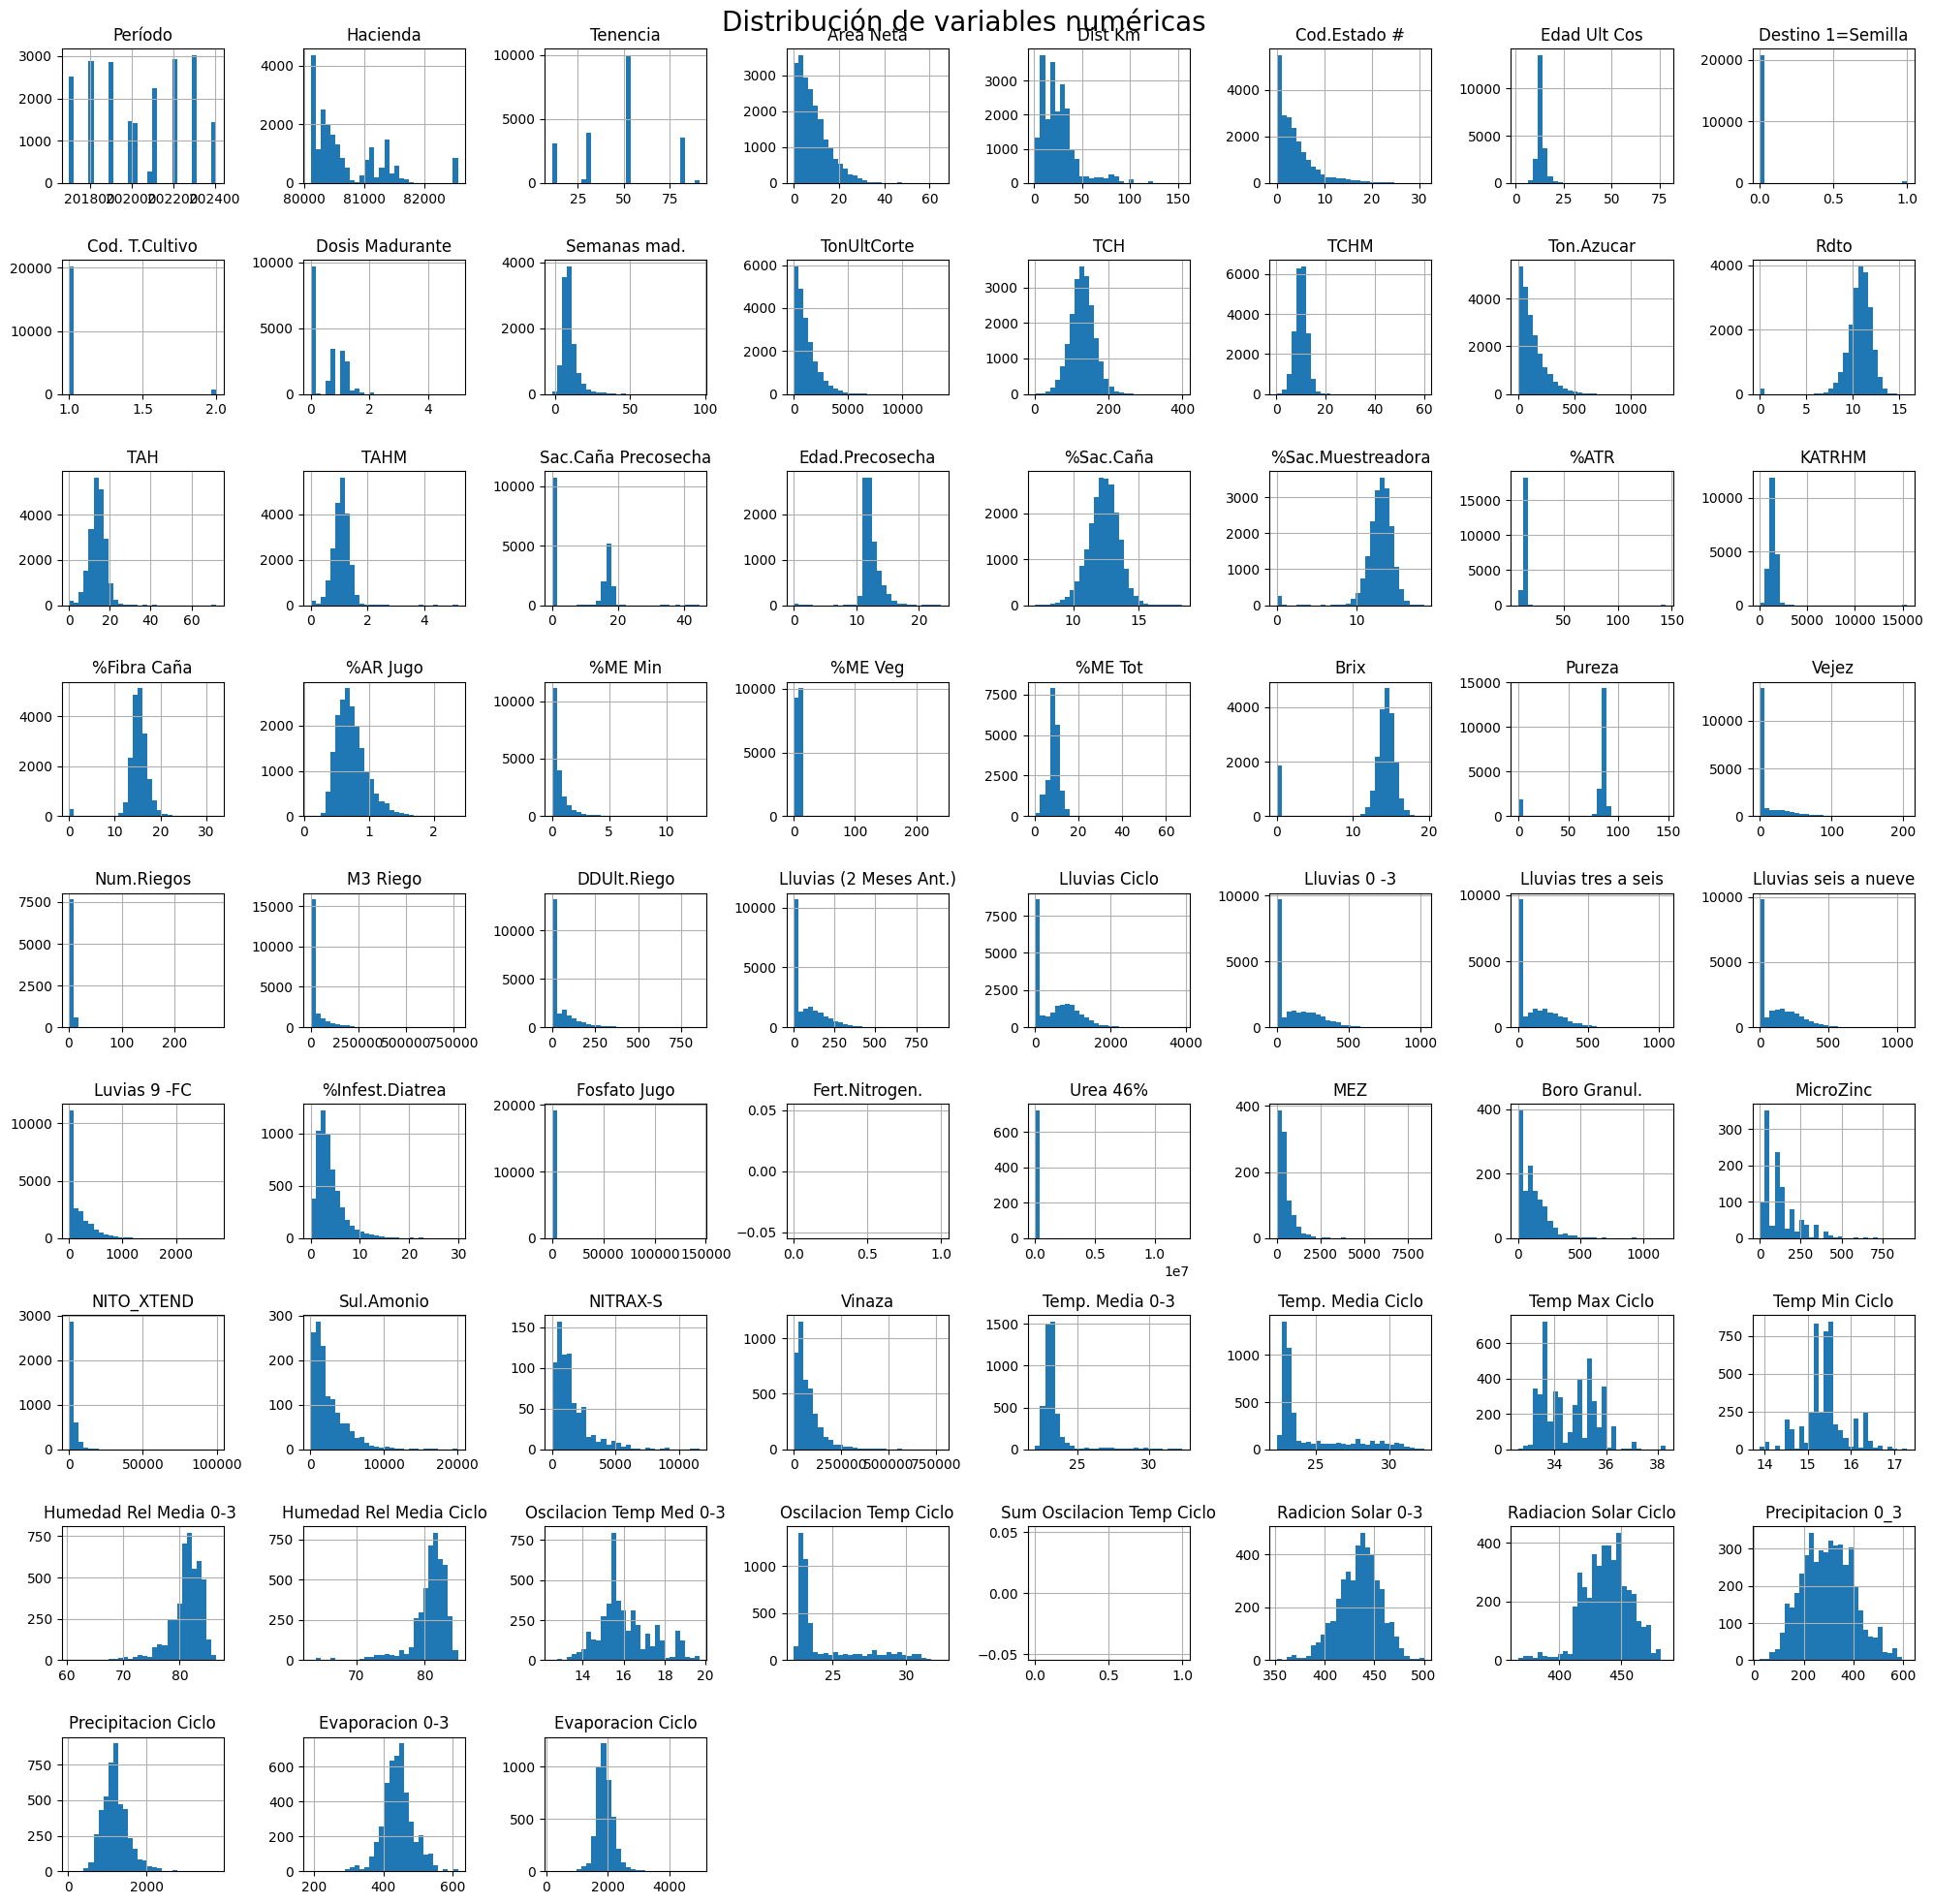

In [8]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

In [9]:
CATEGORICAL_CANDIDATES = ['Hacienda', 'Cod.Estado #', 'Cod. T.Cultivo', 'Destino 1=Semilla']
print(df[CATEGORICAL_CANDIDATES].head(10))

   Hacienda  Cod.Estado #  Cod. T.Cultivo  Destino 1=Semilla
0     80493             5             1.0                  0
1     81284             5             1.0                  0
2     80203             4             1.0                  0
3     81380             2             1.0                  0
4     80298             3             1.0                  0
5     80328             2             1.0                  0
6     80194             4             1.0                  0
7     80203             4             1.0                  0
8     80942             1             1.0                  0
9     81311             1             1.0                  0


#### **Porcentaje de Nulos**

In [10]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Sum Oscilacion Temp Ciclo    100.000000
Fert.Nitrogen.               100.000000
Urea 46%                      96.561564
NITRAX-S                      96.442669
MEZ                           95.382128
MicroZinc                     94.535597
Boro Granul.                  93.888810
Sul.Amonio                    93.546393
NITO_XTEND                    82.503448
Vinaza                        80.510772
Humedad Rel Media Ciclo       78.456271
Temp. Media 0-3               78.456271
Oscilacion Temp Med 0-3       78.456271
Temp. Media Ciclo             78.456271
Temp Max Ciclo                78.456271
Humedad Rel Media 0-3         78.456271
Radiacion Solar Ciclo         78.456271
Evaporacion 0-3               78.456271
Precipitacion Ciclo           78.456271
Evaporacion Ciclo             78.456271
Temp Min Ciclo                78.456271
Oscilacion Temp Ciclo         78.456271
Radicion Solar 0-3            78.456271
Precipitacion 0_3             78.456271
%Infest.Diatrea               73.367575


#### **Columnas Vacías**

Eliminamos columnas vacías del Df y aquellas que generan mucho ruido (HACIENDA), identificadores de cada hacienda. 


In [11]:
COLUMNS_TO_DROP = ['Sum Oscilacion Temp Ciclo', 'Fert.Nitrogen.', 'Hacienda']
df = df.drop(columns = COLUMNS_TO_DROP)

#### **Chem Features**

Se observan columnas con porcentajes de nulos demasiado altos [99% - 80%]. Parecen columnas relacionadas a productos o químicos que se utilizaron en la plantación, su ausencia podría indicar que el producto no se usó. Se imputarán con 0's. 


In [12]:
CHEM_FEATURES = ['Urea 46%', 'NITRAX-S', 'MEZ', 'NITO_XTEND', 'Vinaza', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio']
df[CHEM_FEATURES] = df[CHEM_FEATURES].fillna(0)

In [13]:
null_percent = df.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(10)

Precipitacion Ciclo        78.456271
Precipitacion 0_3          78.456271
Temp Max Ciclo             78.456271
Temp Min Ciclo             78.456271
Oscilacion Temp Med 0-3    78.456271
Oscilacion Temp Ciclo      78.456271
Radiacion Solar Ciclo      78.456271
Radicion Solar 0-3         78.456271
Evaporacion Ciclo          78.456271
Evaporacion 0-3            78.456271
dtype: float64

#### **Weather Features - Variables Climaticas**
Se observa un porcentaje en común con variables relacionadas con condiciones climáticas (78.456271%) por esa razón, se procede a agruparlas en la categoría de weather features. Por el momento se dejan agrupadas

In [14]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']

#### **Analisis de Correlaciones**

Matrices de correlación orientadas a **variables objetivo** y general

In [15]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Tenencia', 'Area Neta', 'Dist Km', 'Cod.Estado #',
       'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Urea 46%', 'MEZ', 'Boro Granul.',
       'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza',
       'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo',
       'Radicion Solar 0

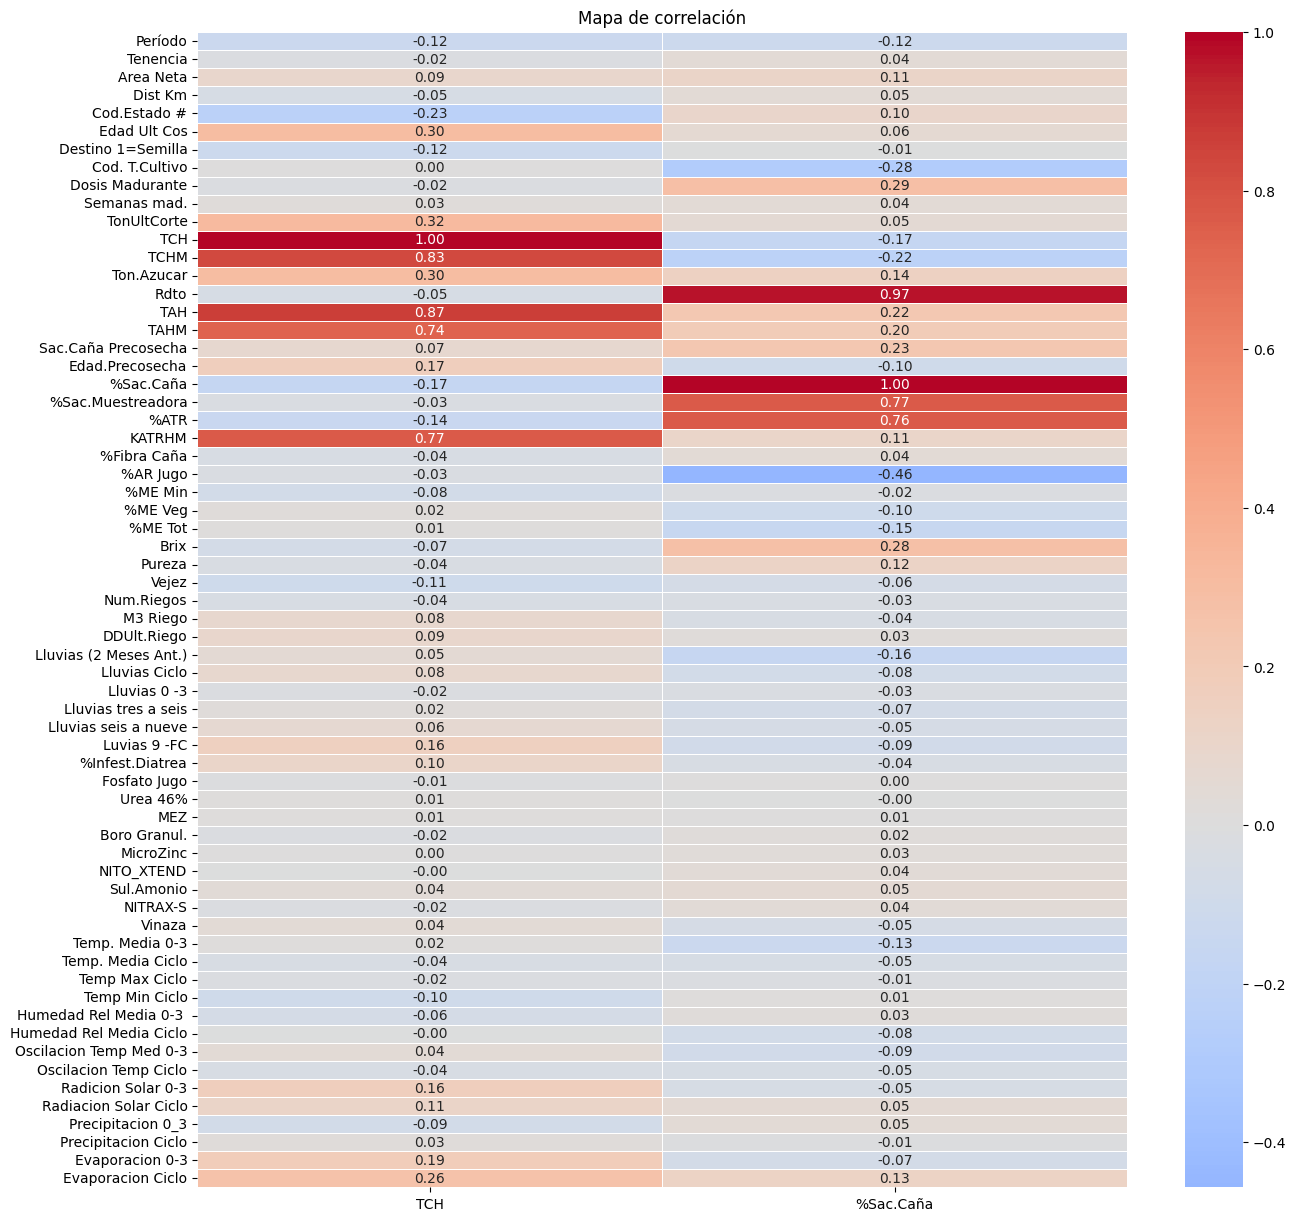

In [16]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

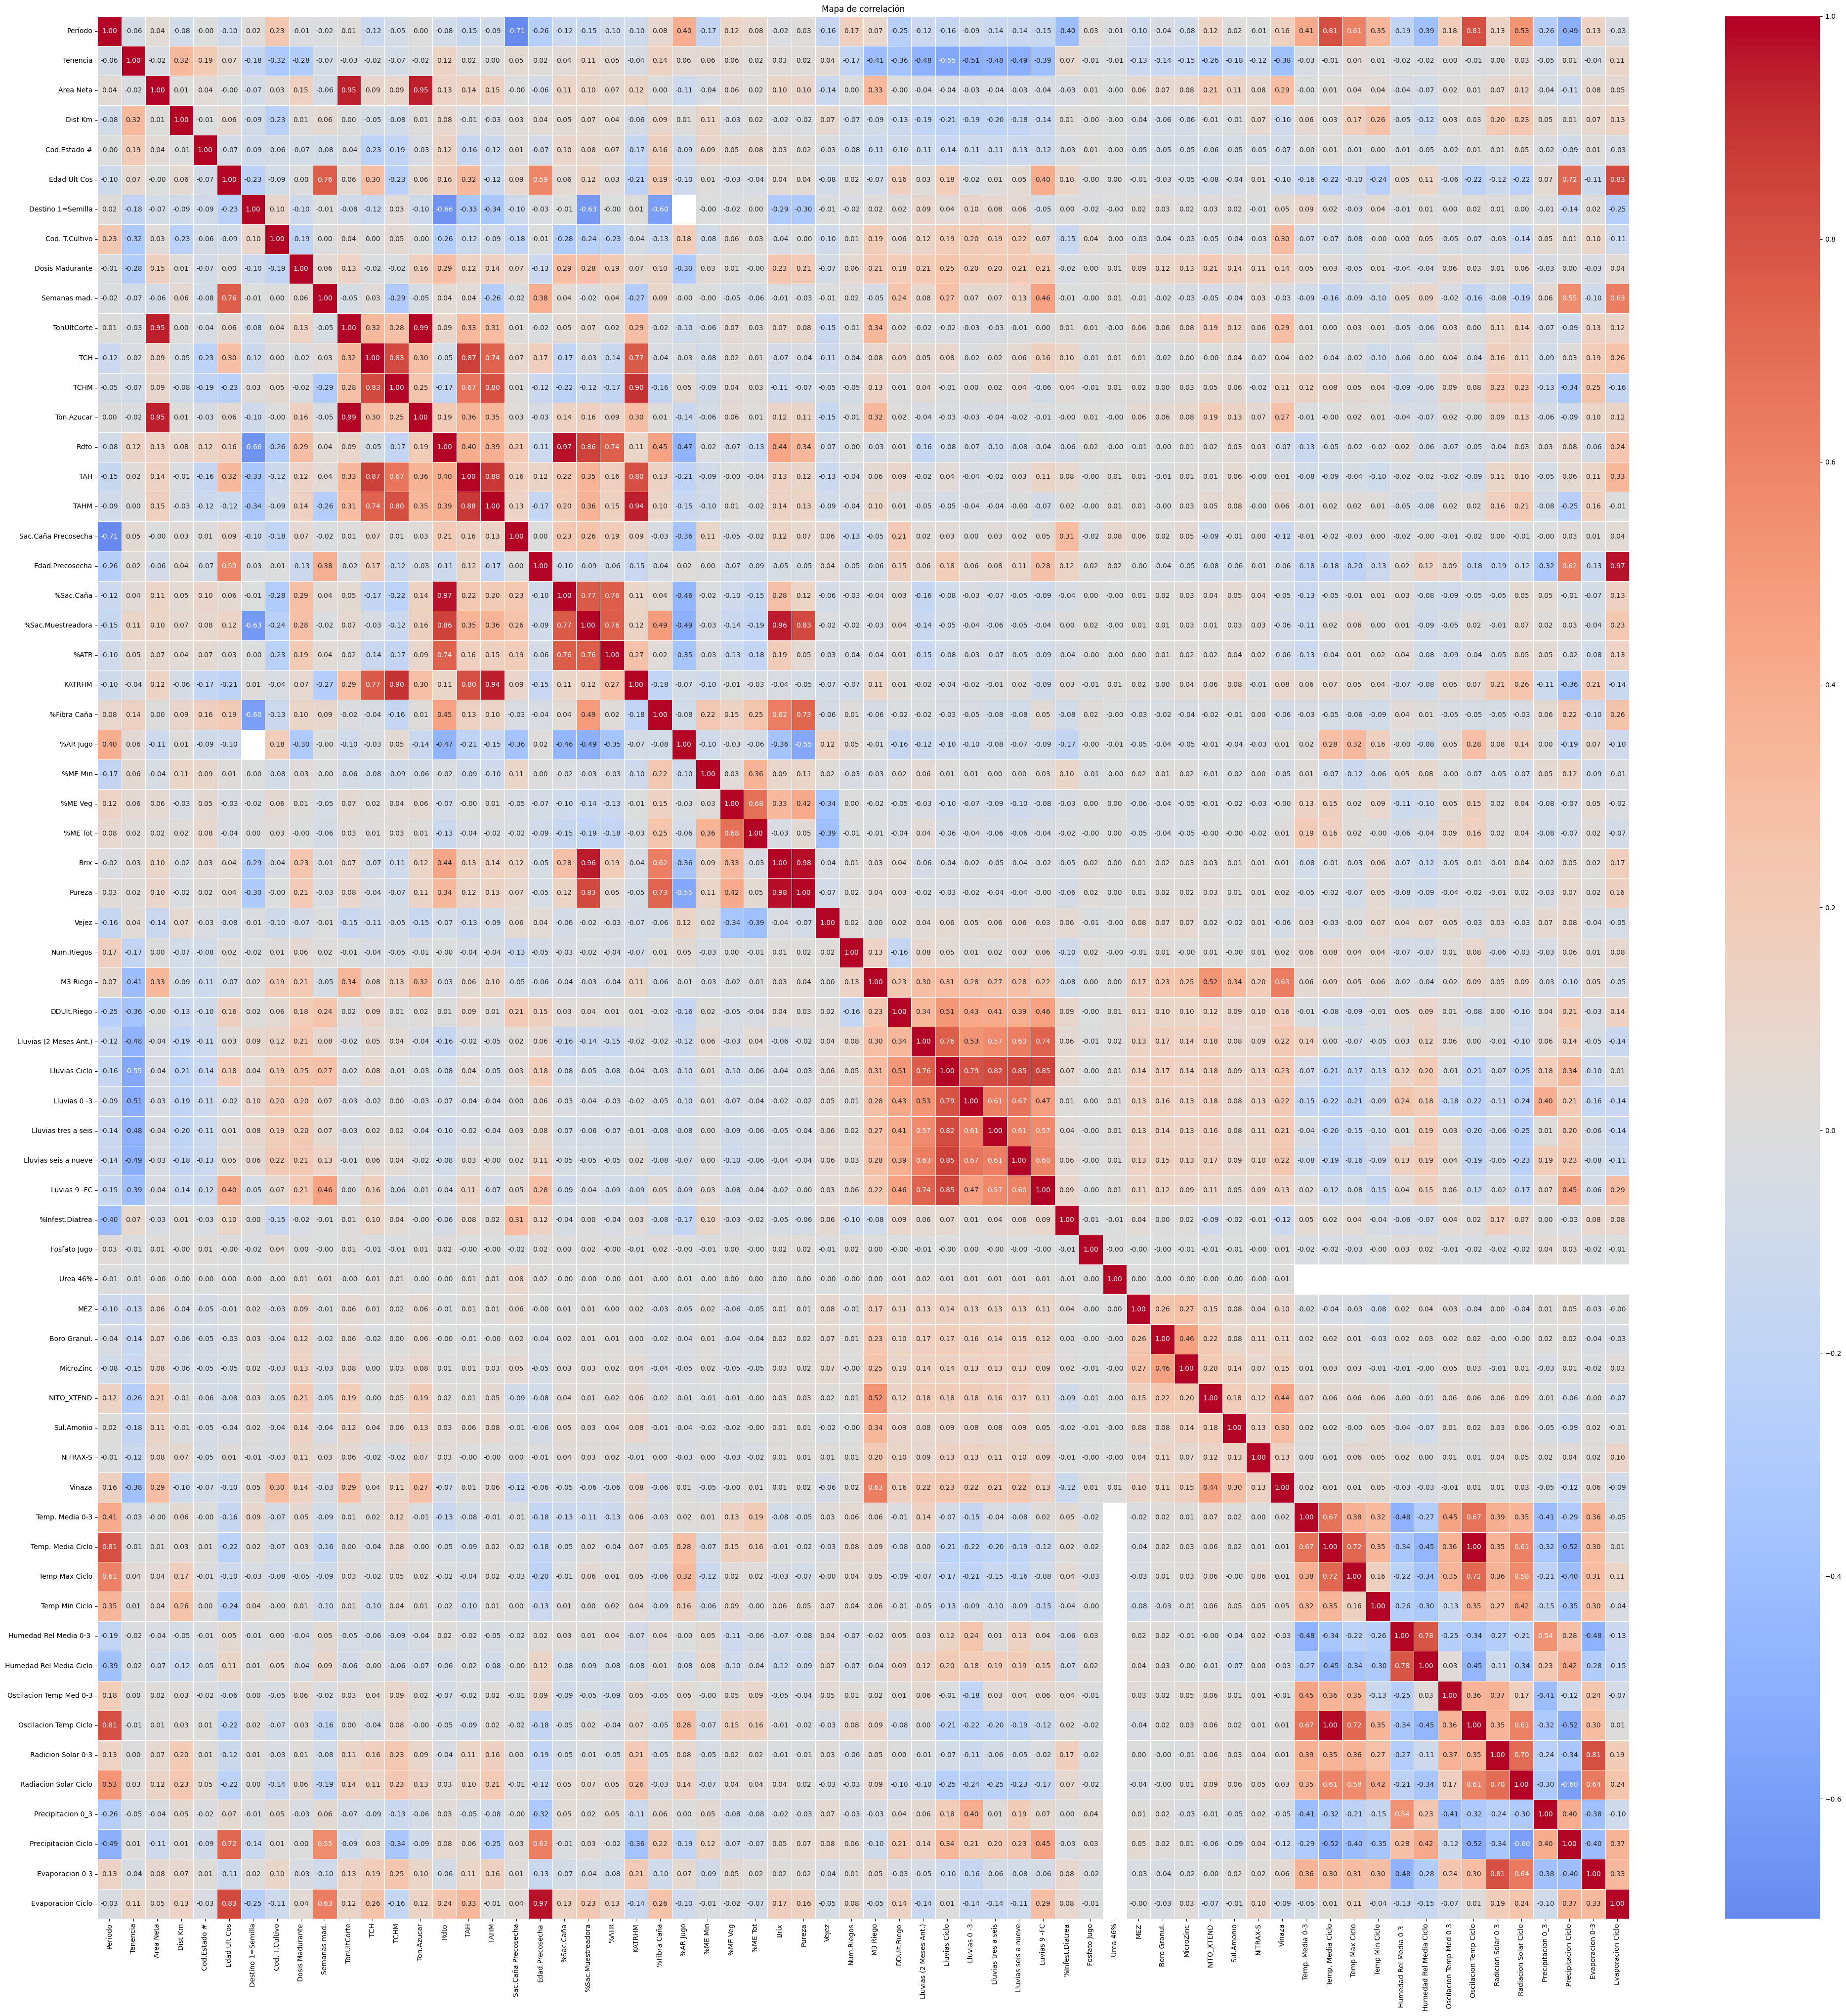

In [17]:
## Subset 
plt.figure(figsize=(50,50))
sns.heatmap(numerical_corr, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Posible multicolinealidad entre: 
- `TCH` y `TCHM` 
- `TAH` y `TAHM`
- `Brix` y `Pureza`
- `Edad precosecha` y `Evaporación Ciclo`
- `Oscilación Temp Ciclo` y `Temp Media Ciclo`

Se sugiere eliminar además variables que están altamente correlacionadas con la variable objetivo, posiblemente porque son métricas que se tomaron ya luego del cultivo, variables resultado. 

#### **Data Leakage**

In [18]:
LEAKAGE = [
    'TCHM','Ton.Azucar','Rdto','TAH','TAHM',
    '%Sac.Muestreadora','%ATR','KATRHM','Brix','Pureza',
    '%AR Jugo','%Fibra Caña','Sac.Caña Precosecha','%ME Min','%ME Veg','%ME Tot',
    'TonUltCorte', 'Fosfato Jugo'
]

In [19]:
df_mod = df.drop(columns=LEAKAGE)

#### **Irrigation Features**

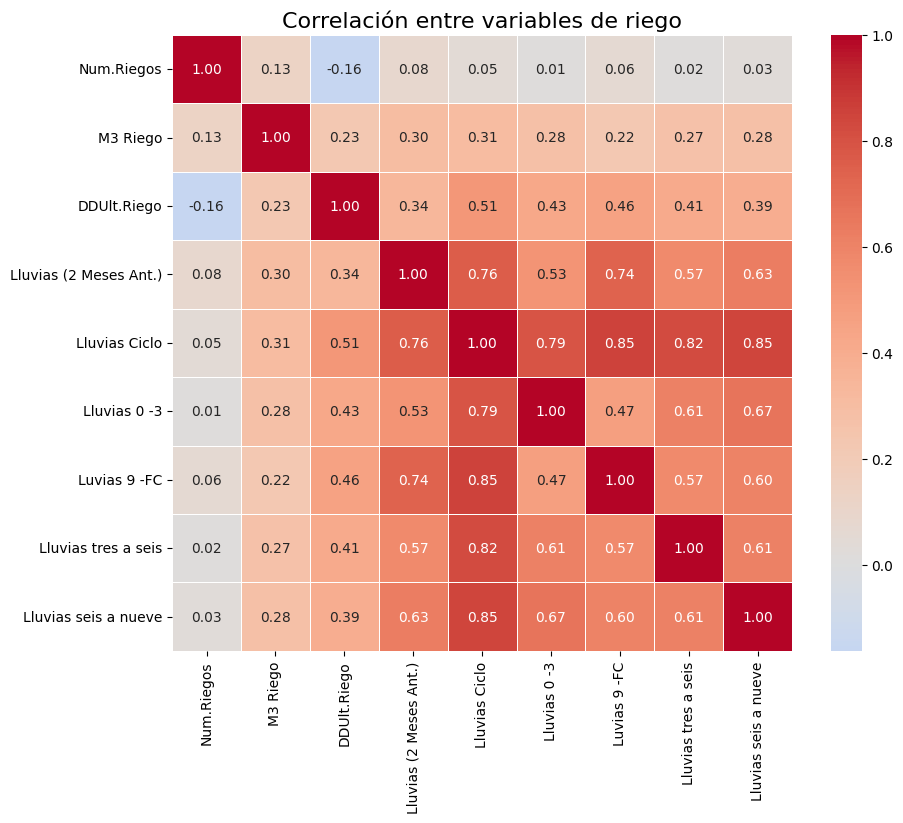

In [20]:
NUMERICAL_FEATURES = df_mod.select_dtypes(include=["int64", "float64"]).columns
IRRIG_FEATURES = ['Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Luvias 9 -FC', 'Lluvias tres a seis', 'Lluvias seis a nueve']
corr_matrix_irrig = df_mod[IRRIG_FEATURES].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_irrig, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables de riego", fontsize=16)
plt.show()

In [21]:
df_mod = df_mod.drop(columns = ['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Luvias 9 -FC', 'Lluvias tres a seis', 'Lluvias seis a nueve'])

#### **Correlación en variables del clima**

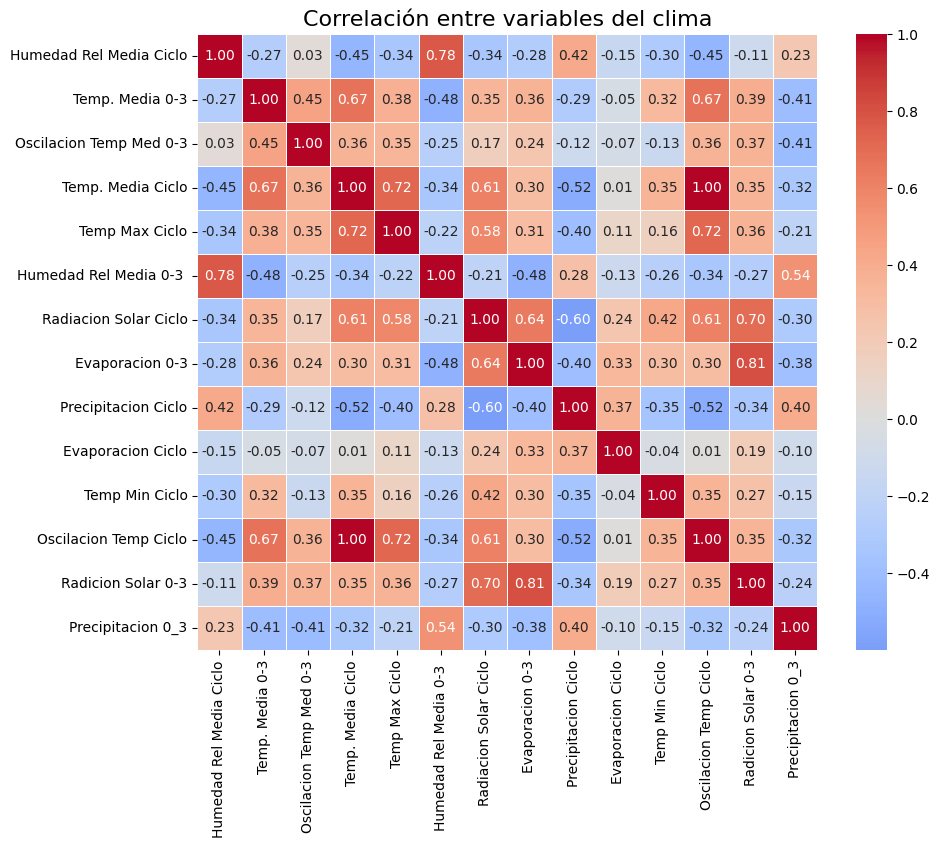

In [22]:
corr_matrix_weather = df_mod[WEATHER_FEATURES].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_weather, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables del clima", fontsize=16)
plt.show()

In [23]:
WEATHER_FEATURES = ['Humedad Rel Media Ciclo', 'Temp. Media 0-3', 'Oscilacion Temp Med 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Humedad Rel Media 0-3 ', 'Radiacion Solar Ciclo', 'Evaporacion 0-3', 'Precipitacion Ciclo', 'Evaporacion Ciclo', 'Temp Min Ciclo', 'Radicion Solar 0-3', 'Precipitacion 0_3']
df_mod = df_mod.drop(columns = ['Oscilacion Temp Ciclo'])

Se elimina Oscilacion Temp Ciclo debido a que comparte la misma correlación con Temp. Media Ciclo, es decir, son la misma variable o tienen los mismos registros. 

#### **Imputación de otros features**  
Excluyendo las variables del clima, tenemos los siguientes features a analizar

In [24]:
df_sinclima = df_mod.drop(columns = WEATHER_FEATURES)
null_percent = df_sinclima.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

%Infest.Diatrea      73.367575
Codigo Estacion      70.109859
D.S.                 65.910496
Num.Riegos           59.870643
Ult.Riego            59.718457
Edad.Precosecha      57.583107
Producto             46.502116
Fec.Madur.           46.487849
Semanas mad.         46.487849
Suelo                17.872259
Vejez                11.627907
%Sac.Caña             2.135350
Cerca de              0.599230
Dosis Madurante       0.494602
Dist Km               0.023779
Cultivo               0.009512
Cod. T.Cultivo        0.009512
Tenencia              0.004756
F.Siembra             0.000000
Zona                  0.000000
Suerte                0.000000
Período               0.000000
Cod.Estado            0.000000
Cod.Estado #          0.000000
Variedad              0.000000
Area Neta             0.000000
Nombre                0.000000
Destino 1=Semilla     0.000000
Edad Ult Cos          0.000000
T.Corte               0.000000
Tipo Quema            0.000000
TCH                   0.000000
F.Ult.Co

In [25]:
## % Infestación se crea variable dummy 
df_mod['diatrea_measured'] = df_mod["%Infest.Diatrea"].notna().astype(int)
## Imputar NaN por 0 
df_mod = df_mod.drop(columns = ['%Infest.Diatrea'])

In [26]:
df_mod = df_mod.drop(columns = ['Codigo Estacion'])

In [27]:
#df_mod = df_mod.drop(columns = ['D.S.'])

In [28]:
df_mod = df_mod[df_mod["Num.Riegos"].notna()]

In [29]:
df_mod = df_mod[df_mod["Edad.Precosecha"].notna()]
df_mod.shape

(4331, 57)

In [30]:
df_sinclima = df_mod.drop(columns = WEATHER_FEATURES)

In [31]:
df_sinclima["Producto"] = df_sinclima["Producto"].fillna("Sin producto")

df_sinclima["Producto"] = df_sinclima["Producto"].apply(
    lambda x: "BONUS" if x == "BONUS 250 EC REGULADOR FISIOLOGICO"
    else ("Sin producto" if x == "Sin producto" else "Otros")
)

In [32]:
null_percent = df_sinclima.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

D.S.                 40.360194
Fec.Madur.           29.092588
Semanas mad.         29.092588
Vejez                11.844840
Dosis Madurante       0.207804
%Sac.Caña             0.161625
Suelo                 0.138536
Dist Km               0.023089
Tenencia              0.000000
Zona                  0.000000
Período               0.000000
Nombre                0.000000
F.Siembra             0.000000
Cod.Estado            0.000000
Cod.Estado #          0.000000
Variedad              0.000000
Area Neta             0.000000
Suerte                0.000000
Edad Ult Cos          0.000000
Ult.Riego             0.000000
Cultivo               0.000000
Cod. T.Cultivo        0.000000
Destino 1=Semilla     0.000000
F.Ult.Corte           0.000000
TCH                   0.000000
Producto              0.000000
Edad.Precosecha       0.000000
Tipo Quema            0.000000
T.Corte               0.000000
Cerca de              0.000000
Cosechó               0.000000
Num.Riegos            0.000000
M3 Riego

In [33]:
df_sinclima = df_sinclima.drop(columns = ['Fec.Madur.'])

In [34]:
df_sinclima = df_sinclima.drop(columns = ['Nombre'])

In [35]:
#df_sinclima = df_sinclima.drop(columns=['Suerte'])

In [36]:
df_sinclima = df_sinclima.drop(columns = ['Cod.Estado #'])

In [37]:
umbral_zona = 300  
zonas_comunes = df_sinclima['Zona'].value_counts()[df_sinclima['Zona'].value_counts() >= umbral_zona].index
df_sinclima['Zona'] = df_sinclima['Zona'].apply(lambda x: x if x in zonas_comunes else "Otros")

In [38]:
umbral_cod = 50 
cod_comunes = df_sinclima['Cod.Estado'].value_counts()[df_sinclima['Cod.Estado'].value_counts() >= umbral_cod].index
df_sinclima['Cod.Estado'] = df_sinclima['Cod.Estado'].apply(lambda x: x if x in cod_comunes else "Otros")

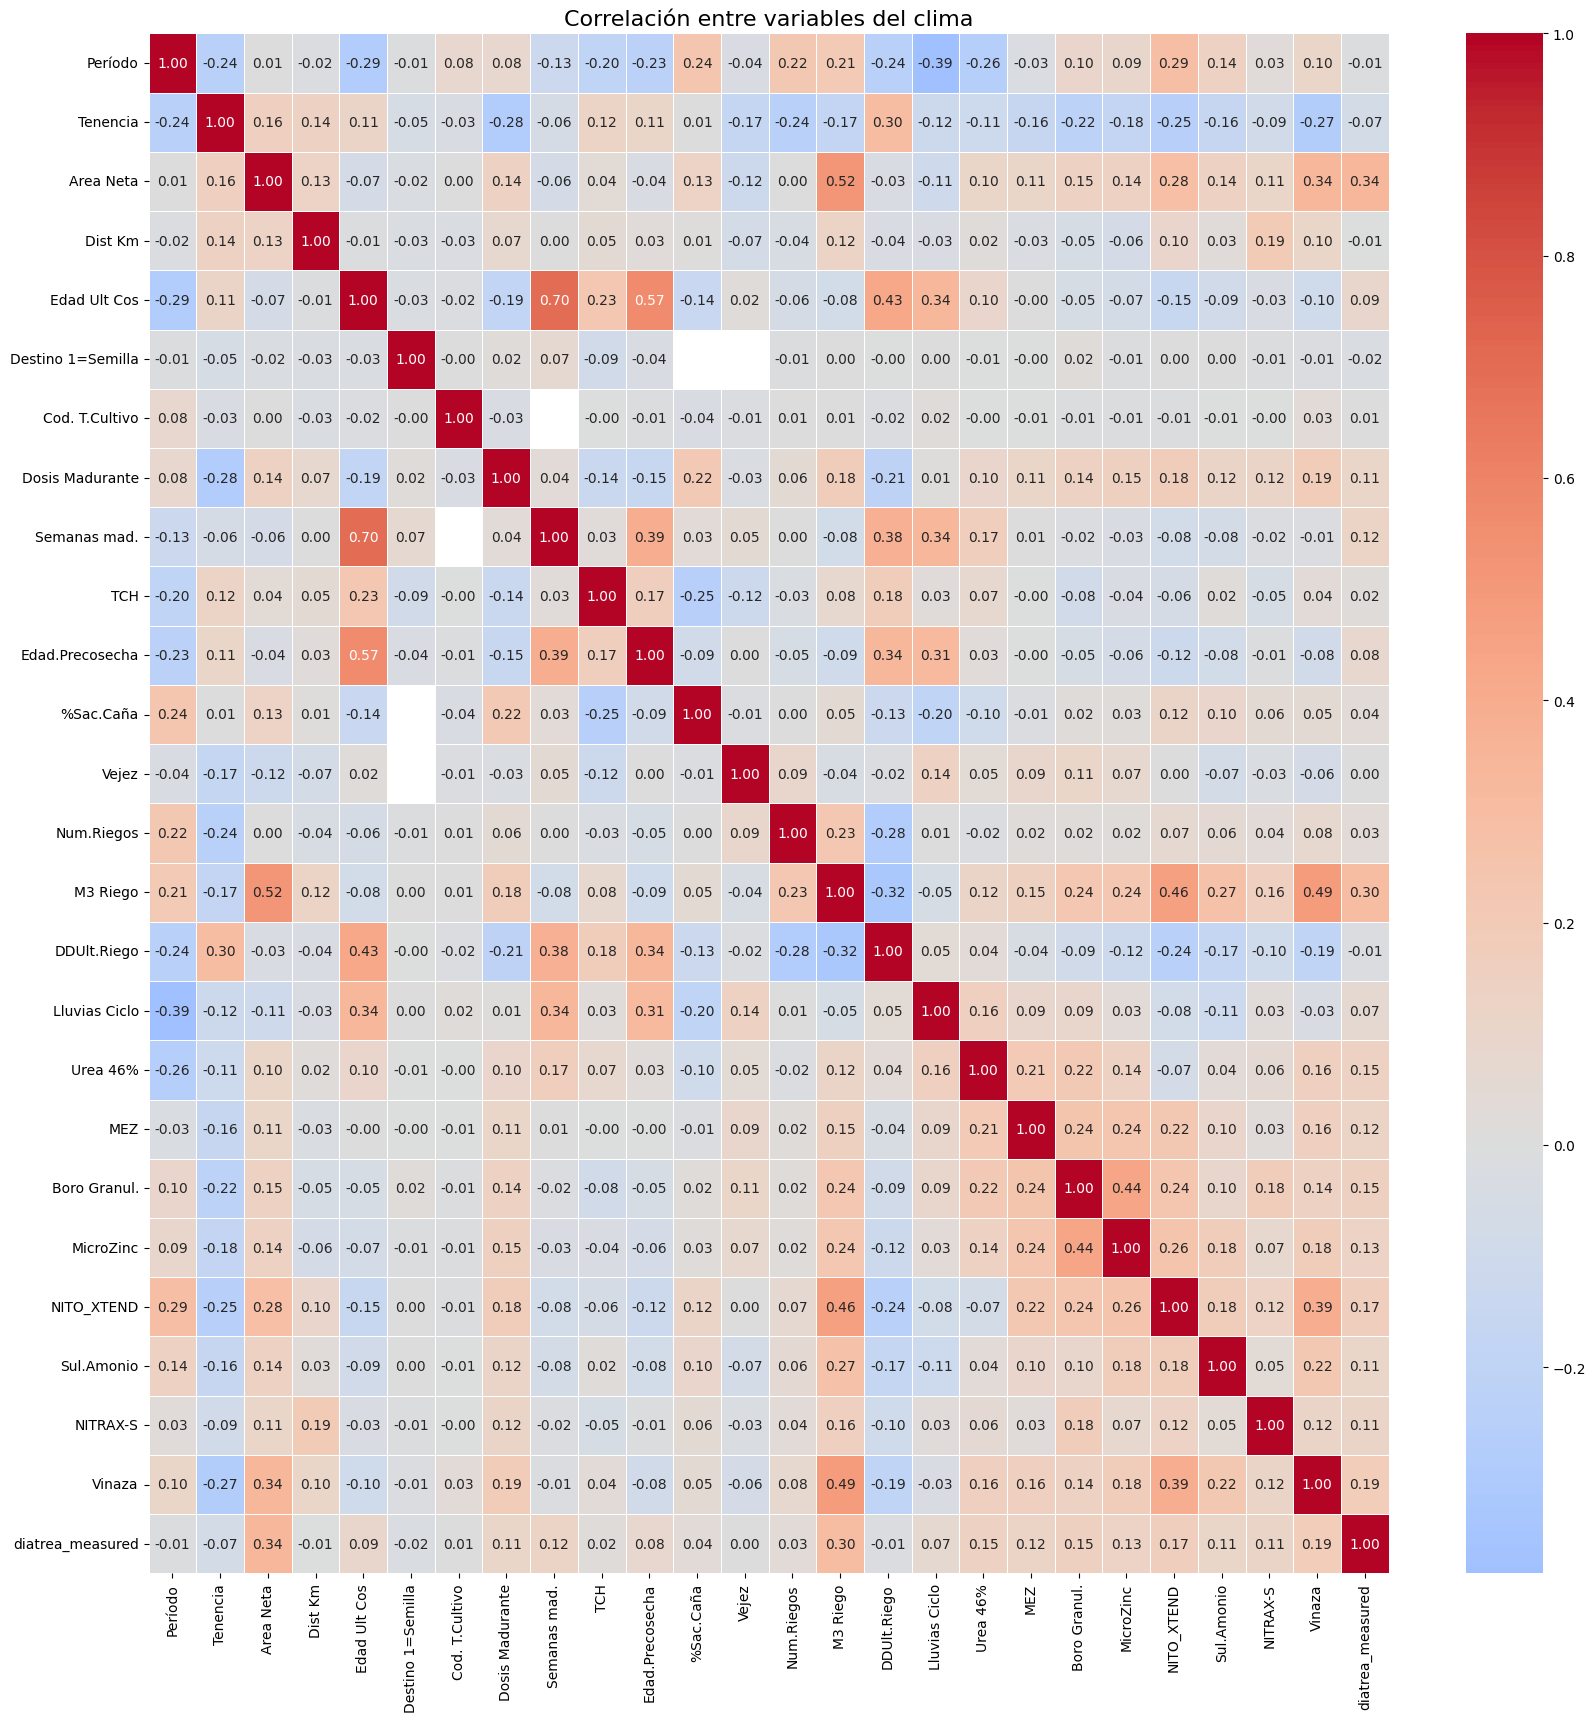

In [39]:
NUMERICAL_FEATURES = df_sinclima.select_dtypes(include=["int64", "float64"]).columns
corr_matrix_gen = df_sinclima[NUMERICAL_FEATURES].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_gen, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Correlación entre variables del clima", fontsize=16)
plt.show()

---
#### **Regresion Lineal: Lasso, Ridge, Polinomial y KNN para TCH**  
Evaluación de regresión en df donde esta filtrado por EdadPrecosecha Not Nan y Riegos Not NaN. 

In [40]:
from sklearn.model_selection import train_test_split

X = df_sinclima.drop(['TCH', '%Sac.Caña'], axis = 1)
y = df_sinclima['TCH']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)


In [41]:
df_sinclima['TCH'].describe()

count    4331.000000
mean      134.548554
std        30.342671
min         1.573653
25%       114.684756
50%       132.996835
75%       153.034235
max       301.608000
Name: TCH, dtype: float64

In [45]:
df_sinclima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4331 entries, 2 to 21001
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Período            4331 non-null   int64         
 1   Zona               4331 non-null   object        
 2   Tenencia           4331 non-null   float64       
 3   Suerte             4331 non-null   object        
 4   Suelo              4325 non-null   object        
 5   Area Neta          4331 non-null   float64       
 6   Dist Km            4330 non-null   float64       
 7   Variedad           4331 non-null   object        
 8   Cod.Estado         4331 non-null   object        
 9   F.Siembra          4331 non-null   datetime64[ns]
 10  D.S.               2583 non-null   object        
 11  Ult.Riego          4331 non-null   datetime64[ns]
 12  Edad Ult Cos       4331 non-null   float64       
 13  F.Ult.Corte        4331 non-null   datetime64[ns]
 14  Destino 1=Se

#### **Regresión Lineal**

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV


numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

cv_scores_lr_mse = -cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lr_r2 = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')

print("--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")


--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 576.9756 (+/- 51.2292)
R^2 promedio: 0.3619 (+/- 0.0403)


In [43]:
X_train.shape

(3464, 39)

#### **Regresión Lineal: Ridge L2 y Lasso L1**

In [44]:
# Pipeline para Ridge
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# Pipeline para Lasso
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso())])

# Definir el rango de alphas para probar
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# GridSearch para Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# GridSearch para Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_ridge.best_estimator_.score(X_train, y_train):.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_lasso.best_estimator_.score(X_train, y_train):.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 5.3367
Mejor MSE (CV): 534.7742
Mejor R² (CV): 0.5268

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0305
Mejor MSE (CV): 544.0609
Mejor R² (CV): 0.4723


#### **KNN**

In [242]:
from sklearn.neighbors import KNeighborsRegressor
# Pipeline para KNN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor())])

# Definir el rango de K para probar
param_grid_knn = {'regressor__n_neighbors': np.arange(1, 31)}

# GridSearch para KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f"\n--- KNN Regressor con GridSearchCV ---")
print(f"Mejor K (n_neighbors): {grid_search_knn.best_params_['regressor__n_neighbors']}")
print(f"Mejor MSE (CV): {-grid_search_knn.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_knn.best_estimator_.score(X_train, y_train):.4f}")


--- KNN Regressor con GridSearchCV ---
Mejor K (n_neighbors): 9
Mejor MSE (CV): 634.3941
Mejor R² (CV): 0.4505



--- Características más importantes según Lasso ---
               Característica  Coeficiente   abs_coef
597    cat__Variedad_CC05-430    33.605003  33.605003
584          cat__Suelo_YUMBO    23.599063  23.599063
590   cat__Variedad_CC01-1940    20.935504  20.935504
67           cat__Suerte_006B    19.203117  19.203117
507   cat__Suelo_CERRITO-NIMA   -18.956507  18.956507
582           cat__Suelo_VEGA    18.609467  18.609467
506       cat__Suelo_CERRITO    -18.305950  18.305950
558      cat__Suelo_PICHICHI    -15.244687  15.244687
119          cat__Suerte_019Z   -15.110907  15.110907
271          cat__Suerte_270A   -14.880770  14.880770
653  cat__Cerca de_Candelaria    13.967405  13.967405
654  cat__Cerca de_El Cerrito    13.572444  13.572444
386           cat__Suerte_450    13.202323  13.202323
24             cat__Zona_IP01   -12.439678  12.439678
557     cat__Suelo_PALMIRITA     12.287344  12.287344
579         cat__Suelo_TESORO    12.104286  12.104286
606   cat__Variedad_CC91-1606

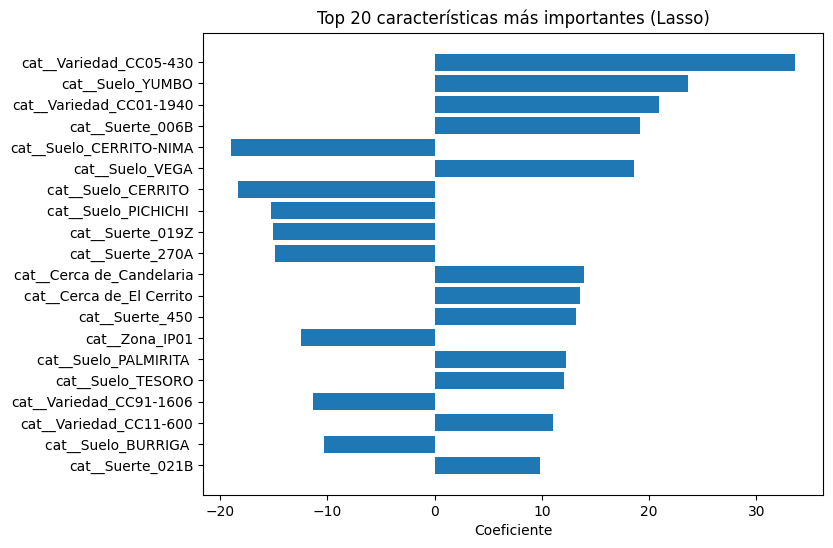


--- Características más influyentes según Ridge ---
               Característica  Coeficiente   abs_coef
597    cat__Variedad_CC05-430    30.794763  30.794763
584          cat__Suelo_YUMBO    22.989387  22.989387
67           cat__Suerte_006B    18.951777  18.951777
590   cat__Variedad_CC01-1940    18.895216  18.895216
271          cat__Suerte_270A   -18.390241  18.390241
119          cat__Suerte_019Z   -18.126779  18.126779
582           cat__Suelo_VEGA    17.472385  17.472385
386           cat__Suerte_450    17.263515  17.263515
507   cat__Suelo_CERRITO-NIMA   -16.453343  16.453343
506       cat__Suelo_CERRITO    -16.405409  16.405409
125          cat__Suerte_021B    16.027379  16.027379
558      cat__Suelo_PICHICHI    -15.814847  15.814847
276          cat__Suerte_270G    15.666419  15.666419
579         cat__Suelo_TESORO    14.702896  14.702896
376          cat__Suerte_378A   -14.664543  14.664543
505        cat__Suelo_CARLINA   -14.037663  14.037663
654  cat__Cerca de_El Cerrito

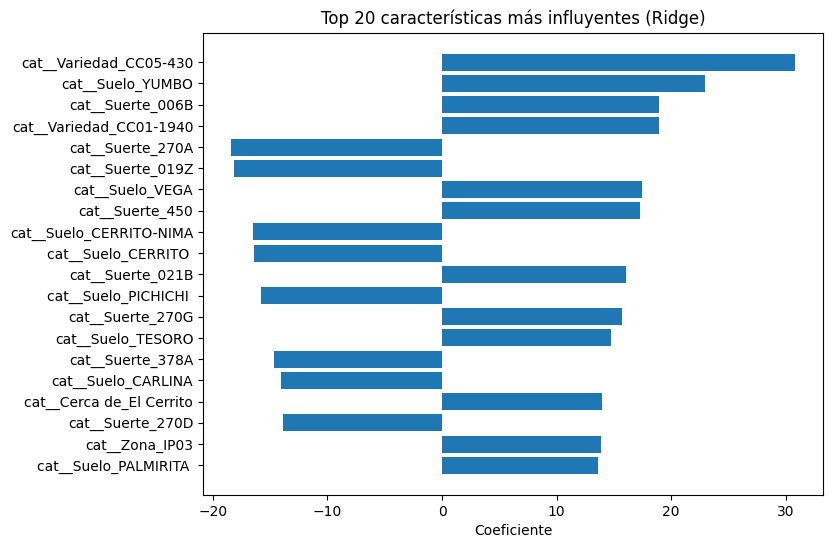

In [243]:
best_lasso_model = grid_search_lasso.best_estimator_
lasso_feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()
lasso_coeffs = best_lasso_model.named_steps['regressor'].coef_

df_lasso = pd.DataFrame({
    'Característica': lasso_feature_names,
    'Coeficiente': lasso_coeffs
})

# Filtramos las que Lasso mantuvo (coef != 0)
significant_lasso = df_lasso[df_lasso['Coeficiente'] != 0] \
    .assign(abs_coef=lambda d: d['Coeficiente'].abs()) \
    .sort_values(by='abs_coef', ascending=False)

print("\n--- Características más importantes según Lasso ---")
print(significant_lasso.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(significant_lasso.head(20)['Característica'],
         significant_lasso.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más importantes (Lasso)")
plt.xlabel("Coeficiente")
plt.show()


# --- Ridge ---
best_ridge_model = grid_search_ridge.best_estimator_
ridge_feature_names = best_ridge_model.named_steps['preprocessor'].get_feature_names_out()
ridge_coeffs = best_ridge_model.named_steps['regressor'].coef_

df_ridge = pd.DataFrame({
    'Característica': ridge_feature_names,
    'Coeficiente': ridge_coeffs,
    'abs_coef': abs(ridge_coeffs)
}).sort_values(by='abs_coef', ascending=False)

print("\n--- Características más influyentes según Ridge ---")
print(df_ridge.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(df_ridge.head(20)['Característica'],
         df_ridge.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más influyentes (Ridge)")
plt.xlabel("Coeficiente")
plt.show()

---
#### **Regresión para %Sac.Caña**

In [49]:
df_sinclima['%Sac.Caña'] = df_sinclima['%Sac.Caña'].fillna(df_sinclima['%Sac.Caña'].median())

In [50]:
from sklearn.model_selection import train_test_split

X = df_sinclima.drop(['TCH', '%Sac.Caña'], axis = 1)
y = df_sinclima['%Sac.Caña']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)


In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV


numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

cv_scores_lr_mse = -cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lr_r2 = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')

print("--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")


--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 0.9493 (+/- 0.0181)
R^2 promedio: 0.0925 (+/- 0.0493)


In [52]:
# Pipeline para Ridge
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# Pipeline para Lasso
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso())])

# Definir el rango de alphas para probar
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# GridSearch para Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# GridSearch para Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_ridge.best_estimator_.score(X_train, y_train):.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_lasso.best_estimator_.score(X_train, y_train):.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 24.7708
Mejor MSE (CV): 0.8120
Mejor R² (CV): 0.3157

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0022
Mejor MSE (CV): 0.8114
Mejor R² (CV): 0.2800
